## Dependencies and File Wrangling

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import pandas_profiling
import seaborn as sns

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset
combined_df = mouse_df.merge(clinical_df, on='Mouse ID')
# combined_df.profile_report()
# Extract the drugs we're interested in:
target_drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
# Display the data table for preview
combined_df = combined_df[combined_df.Drug.isin(target_drugs)]
combined_df



,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
393,q119,Ketapril,0,45.000000,0
394,q119,Ketapril,5,47.864440,0
395,q119,Ketapril,10,51.236606,0
396,n923,Ketapril,0,45.000000,0
397,n923,Ketapril,5,45.824881,0
...,...,...,...,...,...
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1


# Parameter Calculation

## Tumor Response to Treatment (Mean Tumor Volume w/ std. err)

In [2]:
# Calculate the MTV dataframe:
mtv_cols = ['Drug', 'Timepoint', 'Tumor Volume (mm3)']
target_cols = ['Drug', 'Timepoint']
mtv_df = combined_df[mtv_cols].groupby(target_cols, as_index=False).mean()
# Calculate the Std Err:
std_err_tv = combined_df[mtv_cols].groupby(['Drug', 'Timepoint']).sem().reset_index()
# tac it on to the dataframe
mtv_df['Standard Error'] = std_err_tv['Tumor Volume (mm3)']
# Preview DataFrame
mtv_df

,Drug,Timepoint,Tumor Volume (mm3),Standard Error
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.448593
2,Capomulin,10,43.084291,0.702684
3,Capomulin,15,42.064317,0.838617
4,Capomulin,20,40.716325,0.909731
5,Capomulin,25,39.939528,0.881642
6,Capomulin,30,38.769339,0.934460
7,Capomulin,35,37.816839,1.052241
8,Capomulin,40,36.958001,1.223608
9,Capomulin,45,36.236114,1.223977


## Metastatic Response to Treatment ( Mean MS Count w/ std. err)

In [3]:
# Calculate the Mean Metastatic Site Count:
mms_cols = ['Drug', 'Timepoint', 'Metastatic Sites']
mms_df = combined_df[mms_cols].groupby(['Drug','Timepoint'], as_index=False).mean()
# And It's Standard Error
std_err_ms = combined_df[mms_cols].groupby(['Drug','Timepoint']).sem().reset_index()
mms_df['MS STE']= std_err_ms['Metastatic Sites']
# Convert to DataFrame
mms_df

,Drug,Timepoint,Metastatic Sites,MS STE
0,Capomulin,0,0.000000,0.000000
1,Capomulin,5,0.160000,0.074833
2,Capomulin,10,0.320000,0.125433
3,Capomulin,15,0.375000,0.132048
4,Capomulin,20,0.652174,0.161621
5,Capomulin,25,0.818182,0.181818
6,Capomulin,30,1.090909,0.172944
7,Capomulin,35,1.181818,0.169496
8,Capomulin,40,1.380952,0.175610
9,Capomulin,45,1.476190,0.202591


## Survival Rates

In [4]:
# Count the Mice, Calculate the survival rate at each period First period get's filled with 1
mc_cols = ['Drug', 'Timepoint', 'Mouse ID']
mc_df = combined_df[mc_cols].groupby(['Drug','Timepoint'], as_index=False).count().fillna(0)
mc_df['Deaths'] = mc_df['Mouse ID'].diff().cumsum().fillna(0)
mc_df['Survival Rate'] = 1 - abs(mc_df['Deaths'])/(mc_df['Mouse ID']+ abs(mc_df['Deaths']))
mc_df.head(n=10)



,Drug,Timepoint,Mouse ID,Deaths,Survival Rate
0,Capomulin,0,25,0.0,1.00
1,Capomulin,5,25,0.0,1.00
2,Capomulin,10,25,0.0,1.00
3,Capomulin,15,24,-1.0,0.96
4,Capomulin,20,23,-2.0,0.92
5,Capomulin,25,22,-3.0,0.88
6,Capomulin,30,22,-3.0,0.88
7,Capomulin,35,22,-3.0,0.88
8,Capomulin,40,21,-4.0,0.84
9,Capomulin,45,21,-4.0,0.84


## %Delta Tumor Volume

In [5]:
# Calculate %delta for tumor volume compounded once at the end of the trial:
tv_cols = mtv_df.keys().to_list()
interesting_cols = ['Drug']
# (periods=9) because we have 9 discrete time steps
tv_summary = mtv_df[tv_cols].groupby(interesting_cols, as_index=False).pct_change(periods = 9).dropna()
# For some reason, pct_change drops the drug column name where else where it doesn't. Not sure why. Thankfully it preserves order
tv_summary['Drug'] = mc_df['Drug'].unique()
tv_summary = tv_summary[['Drug', 'Tumor Volume (mm3)']]
tv_summary.head(n=10)

,Drug,Tumor Volume (mm3)
9,Capomulin,-0.194753
19,Infubinol,0.461235
29,Ketapril,0.570288
39,Placebo,0.512980


## Figures and Analysis

['Drug', 'Timepoint', 'Tumor Volume (mm3)']


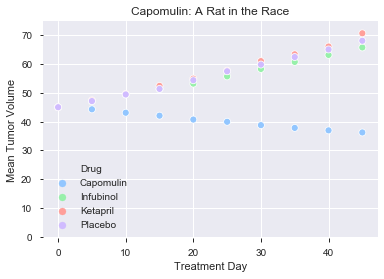

In [6]:
plt.style.use('seaborn-pastel')
print(mtv_cols)
x, y = mtv_cols[1:]
ax3 = sns.scatterplot(x=x, y=y, hue='Drug', ci='float', data=mtv_df, markers='.')
ax3.set_ylim([-0.5, 75])
ax3.set_xlabel('Treatment Day')
ax3.set_ylabel('Mean Tumor Volume')
ax3.set(title='Capomulin: A Rat in the Race')
ax3.legend().set_visible(True)
plt.savefig('graphs/mean_tumor_volume.png')


['Drug', 'Timepoint', 'Metastatic Sites']


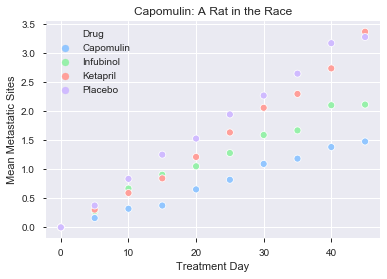

In [7]:
plt.style.use('seaborn-pastel')
print(mms_cols)
x, y = mms_cols[1:]
ax2 = sns.scatterplot(x=x, y=y, hue='Drug', data=mms_df, markers='.')
#ax2.set_ylim([-0.05, 1.05])
ax2.set_xlabel('Treatment Day')
ax2.set_ylabel('Mean Metastatic Sites')
ax2.set(title='Capomulin: A Rat in the Race')
ax2.legend().set_visible(True)
plt.savefig('graphs/mean_metastatic_sites.png')

## Survival Rates Graph

['Capomulin' 'Infubinol' 'Ketapril' 'Placebo']


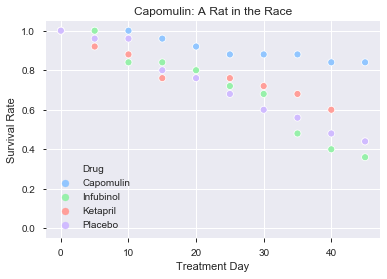

In [8]:
plt.style.use('seaborn-pastel')
x, y = ['Timepoint', 'Survival Rate']
labels = mc_df['Drug'].unique()
print(labels)
ax1 = sns.scatterplot(x=x, y=y, hue='Drug', data=mc_df, markers='.')
#mc_df.plot(y = y, x=x, ax=ax1, rot=0, label=labels.unique())
ax1.set_ylim([-0.05, 1.05])
ax1.set_xlabel('Treatment Day')
ax1.set_ylabel('Survival Rate')
ax1.set(title='Capomulin: A Rat in the Race')
ax1.legend().set_visible(True)
plt.savefig('graphs/survival_rate.png')

## Mean Tumor Volume Change:

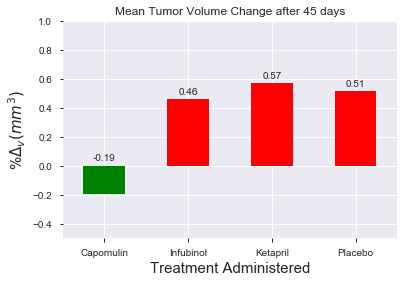

In [9]:
plt.style.use('seaborn-pastel')
x, y = ['Drug', 'Tumor Volume (mm3)']
clrs = ['red' if v > 0 else 'green' for v in (tv_summary['Tumor Volume (mm3)']) ]
g, ax = plt.subplots()
tv_summary.plot(kind='bar', y = y, x=x, ax=ax, color=clrs, rot=0)
ax.set_ylim([-.5,1])
ax.set_xlabel('Treatment Administered', fontsize=15)
# A lil latex for ya
ax.set_ylabel('%$\Delta_v(mm^3)$', fontsize=15)
ax.set(title='Mean Tumor Volume Change after 45 days')
ax.legend().set_visible(False)
# This took some tinkering: 
for x,y in enumerate(tv_summary['Tumor Volume (mm3)']):
    if y < 0:
        ax.text(x=x, y=.05, s=str(round(y,2)), ha='center',va='center')
    else:
        ax.text(x=x, y=y+.05, s=str(round(y,2)), ha='center',va='center')
plt.savefig('graphs/delta_tumor_volume.png')

### Conclusions:
A quick exploratory analysis of our drug trials reveals some insights worth exploring in greater detail:
1. In 3 out 4 metrics Infubinol and Ketapril reliably groups with the placebo in performance.
2. Infubinol has outsized performance in metastatic site reduction when one considers it is ranked last in survival rates. An analysis of side effect frequency rates alongside our mortality data might be usefull in explaining the descrepency.
3. One can say that Capomulin is correlated with improved mortality rates by modestly decreasing the size of the tumor by about 20%. However, when we consider the change versus the control placebo, Capomulin achieves a reduction of almost 70% of expected tumor size.